### Estimadores

In [7]:
est_avg = function(ms) {
    return (2 * mean(ms))
}

est_max = function(ms) {
    return(max(ms))
}

In [14]:
my_ms = c(1.17,1.75,0.28,2.56,2.36,0.36,1.82,0.24,1.17,1.86)

print(c('ext_avg', est_avg(my_ms)), quote=F)
print(c('ext_max', est_max(my_ms)), quote=F)

[1] ext_avg 2.714  
[1] ext_max 2.56   


In [35]:
muestras = lapply(0:50, function(idx) {return(c(runif(10, 0, 3)))})
ns = c(5, 30, 50)

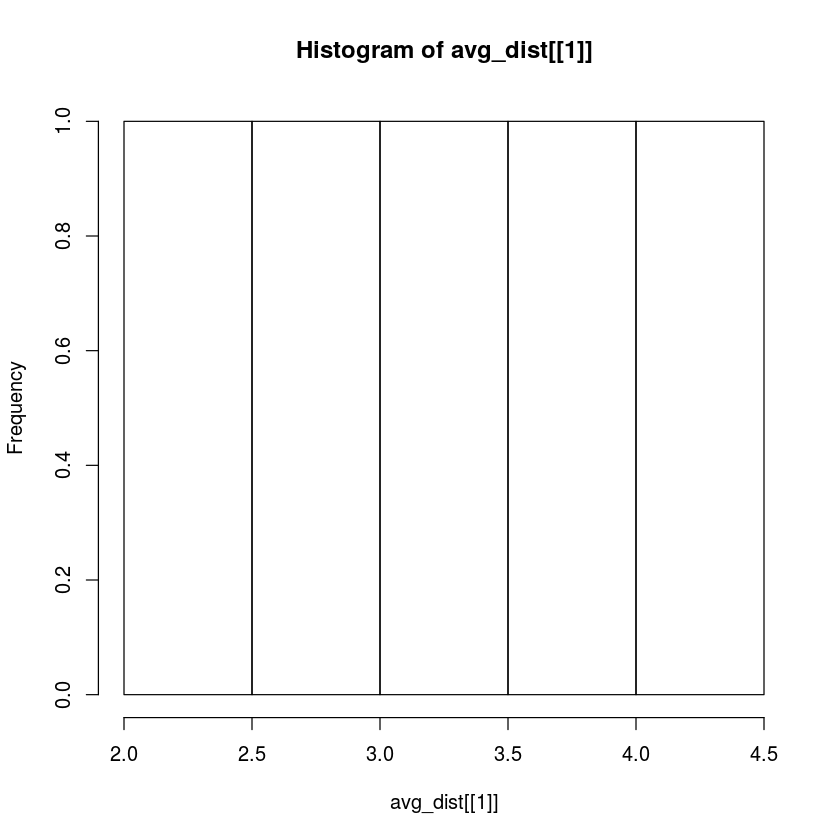

In [46]:
#avg_dist = lapply(ns, function(n) {est_avg(muestras[1:n])})
avg_dist = lapply(ns, function(n) {return(sapply(muestras[0:n], est_avg))})
max_dist = lapply(ns, function(n) {return(sapply(muestras[0:n], est_max))})

hist(avg_dist[[1]], freq=T)